In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from analysis.broke_time import broken_systems

In [3]:
sns.set(style="whitegrid")

In [4]:
max_box = (25**2 + 25**2 + 25**2)**(1/2)
# print(max_box)

In [22]:
folder_path = "./max_distance_cn"
csv_files_cn = [file for file in os.listdir(folder_path) if file.endswith('cn.csv')]
csv_files_cn.sort(key=lambda x:int(x.split('-')[0]))
# print(csv_files_cn)

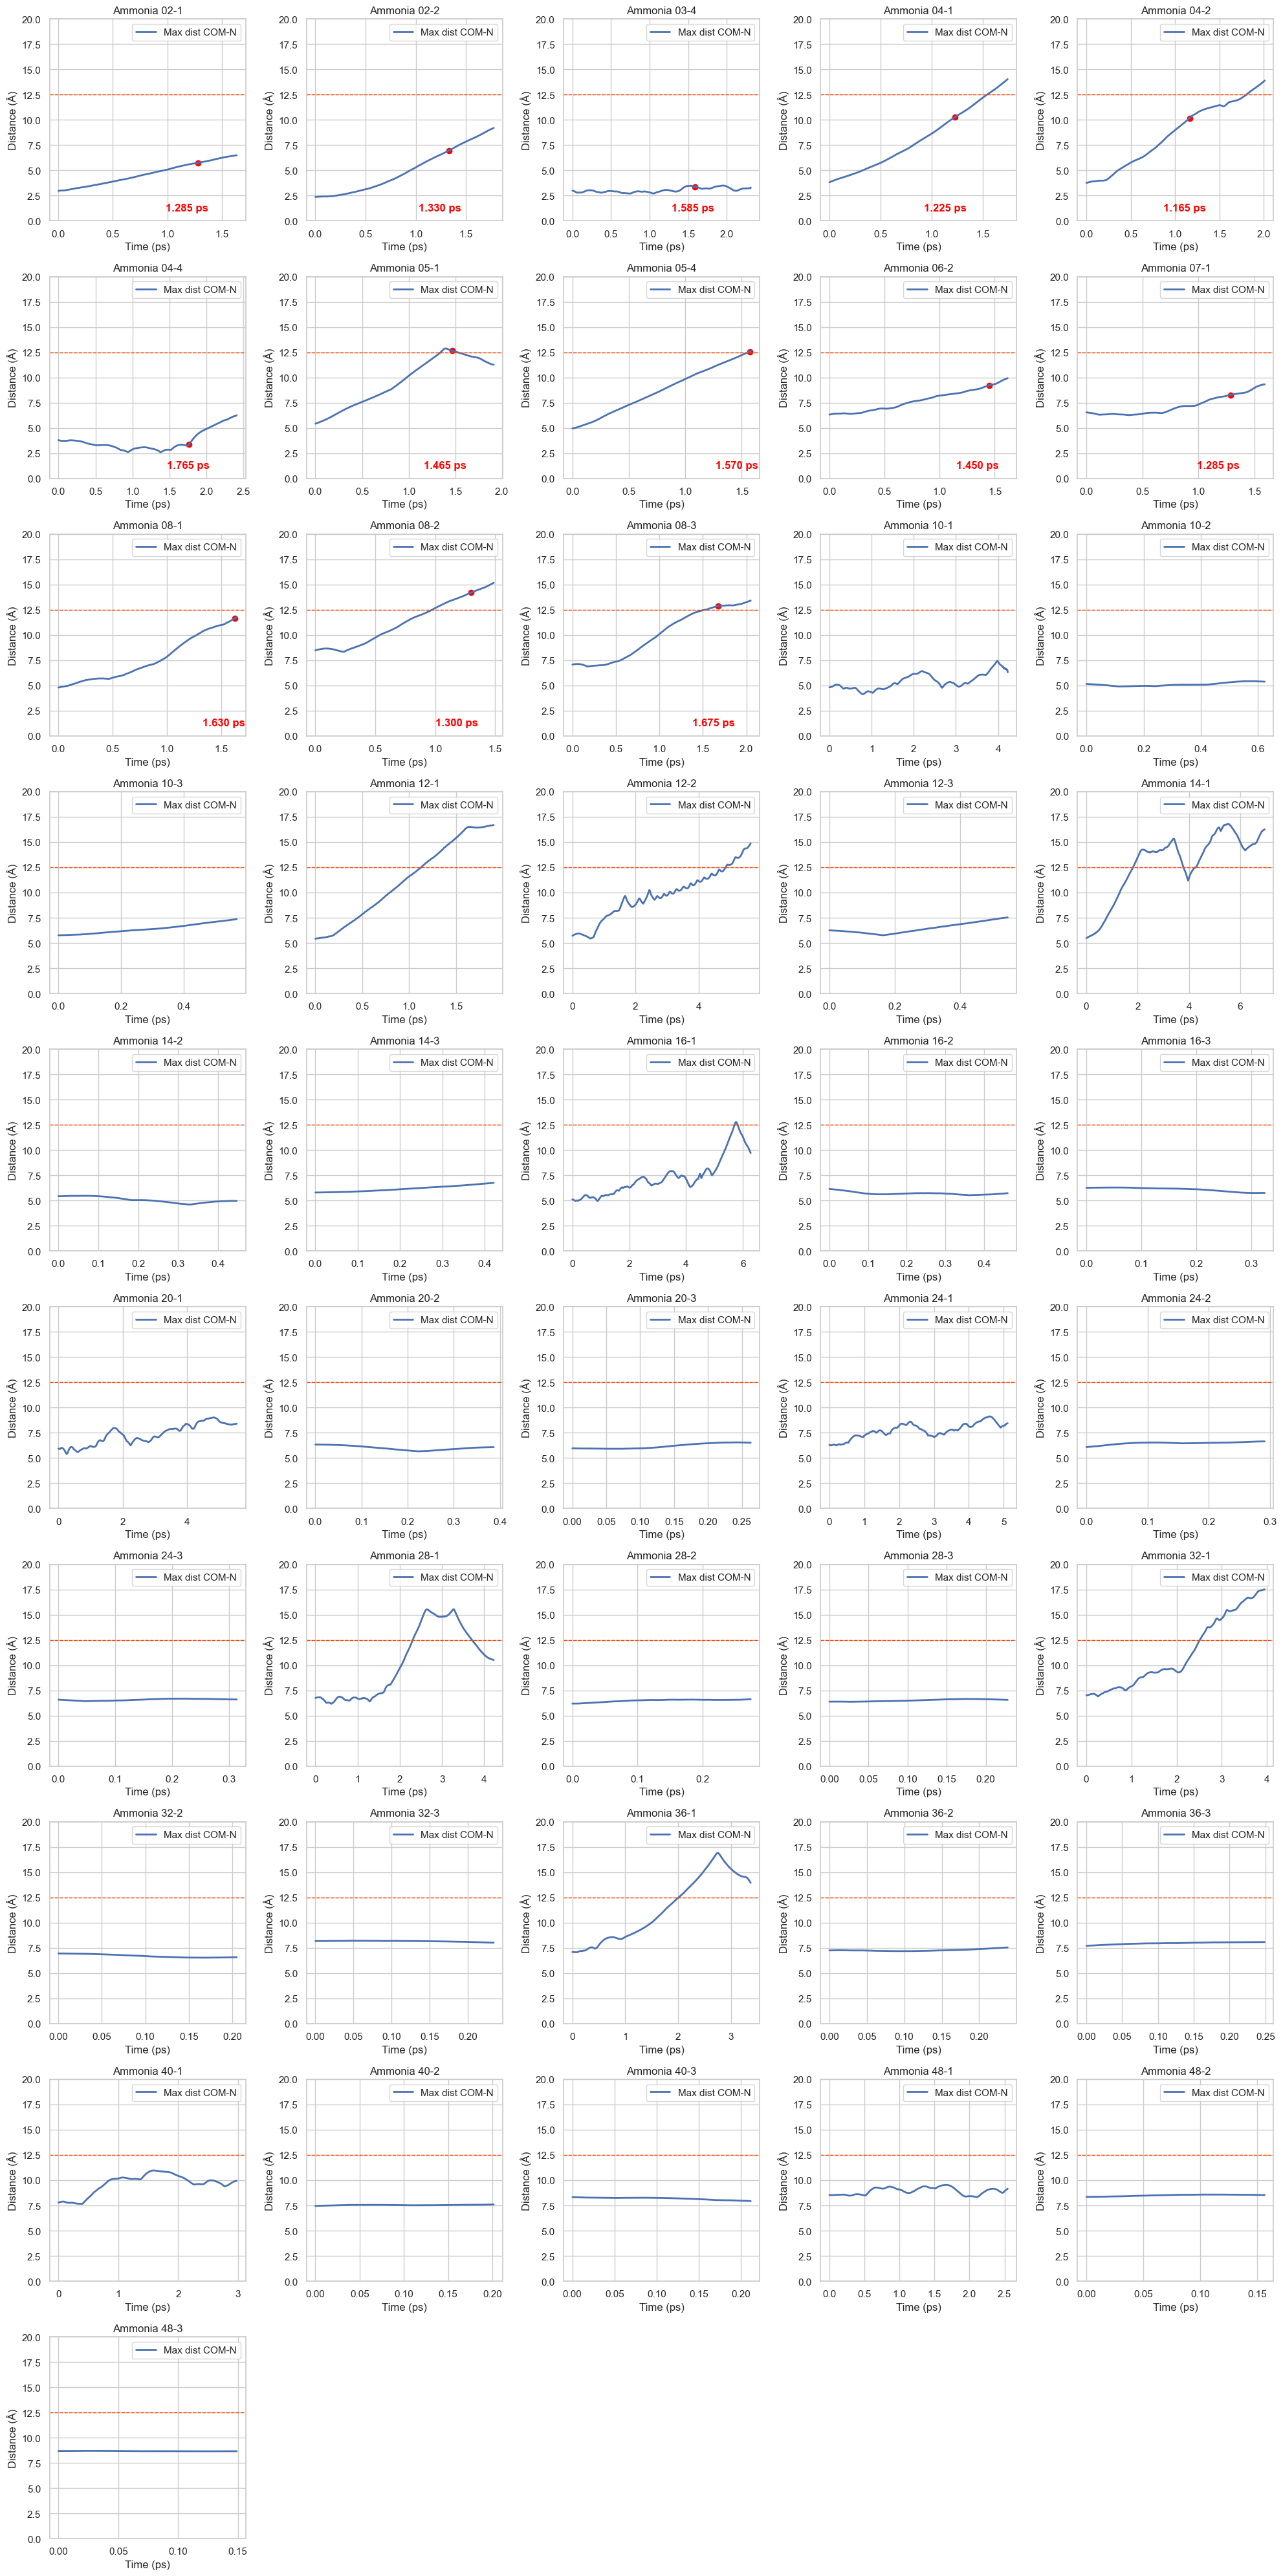

In [23]:
plt.figure(figsize=(20, 40))
num_files = len(csv_files_cn)
cols = 5 
rows = num_files // cols + (num_files % cols > 0)

for i, file in enumerate(csv_files_cn, 1):
    parts = file.split('-')
    no_ammonia = str(int(parts[0]))
    id_cluster = parts[1]
    data_name = int(no_ammonia + id_cluster)
    
    data = pd.read_csv(os.path.join(folder_path, file), header=None)
    ax = plt.subplot(rows, cols, i)
    
    try:
        # ax.plot([broken_systems[data_name]/2000, broken_systems[data_name]/2000], [0, 20], color="red", linestyle='-', lw=1, label="Break up")
        ax.scatter(broken_systems[data_name]/2000, data[1][broken_systems[data_name]], color='red')
        ax.text(broken_systems[data_name]/2000 - 0.3, 1, f'{broken_systems[data_name]/2000:.3f} ps', color='red', weight="bold")
    except:
        pass
    
    ax.plot(data[0]/2000, data[1], label="Max dist COM-N", lw=2)
    ax.axhline(12.5, color="orangered", linestyle='--', lw=1)
    ax.set_title(f'Ammonia {file.rstrip("-cn.csv")}')
    ax.legend()
    ax.set_ylim(0,20)
    ax.set_xlabel('Time (ps)')
    ax.set_ylabel('Distance (Å)')

plt.tight_layout()
plt.savefig("max_dist_com-n.pdf", format="pdf", dpi=300)
plt.savefig("max_dist_com-n.png", dpi=300)
plt.show()

In [18]:
folder_path = "./max_distance_nn"
csv_files_nn = [file for file in os.listdir(folder_path) if file.endswith('nn.csv')]
csv_files_nn.sort(key=lambda x:int(x.split('-')[0]))
# print(csv_files_nn)

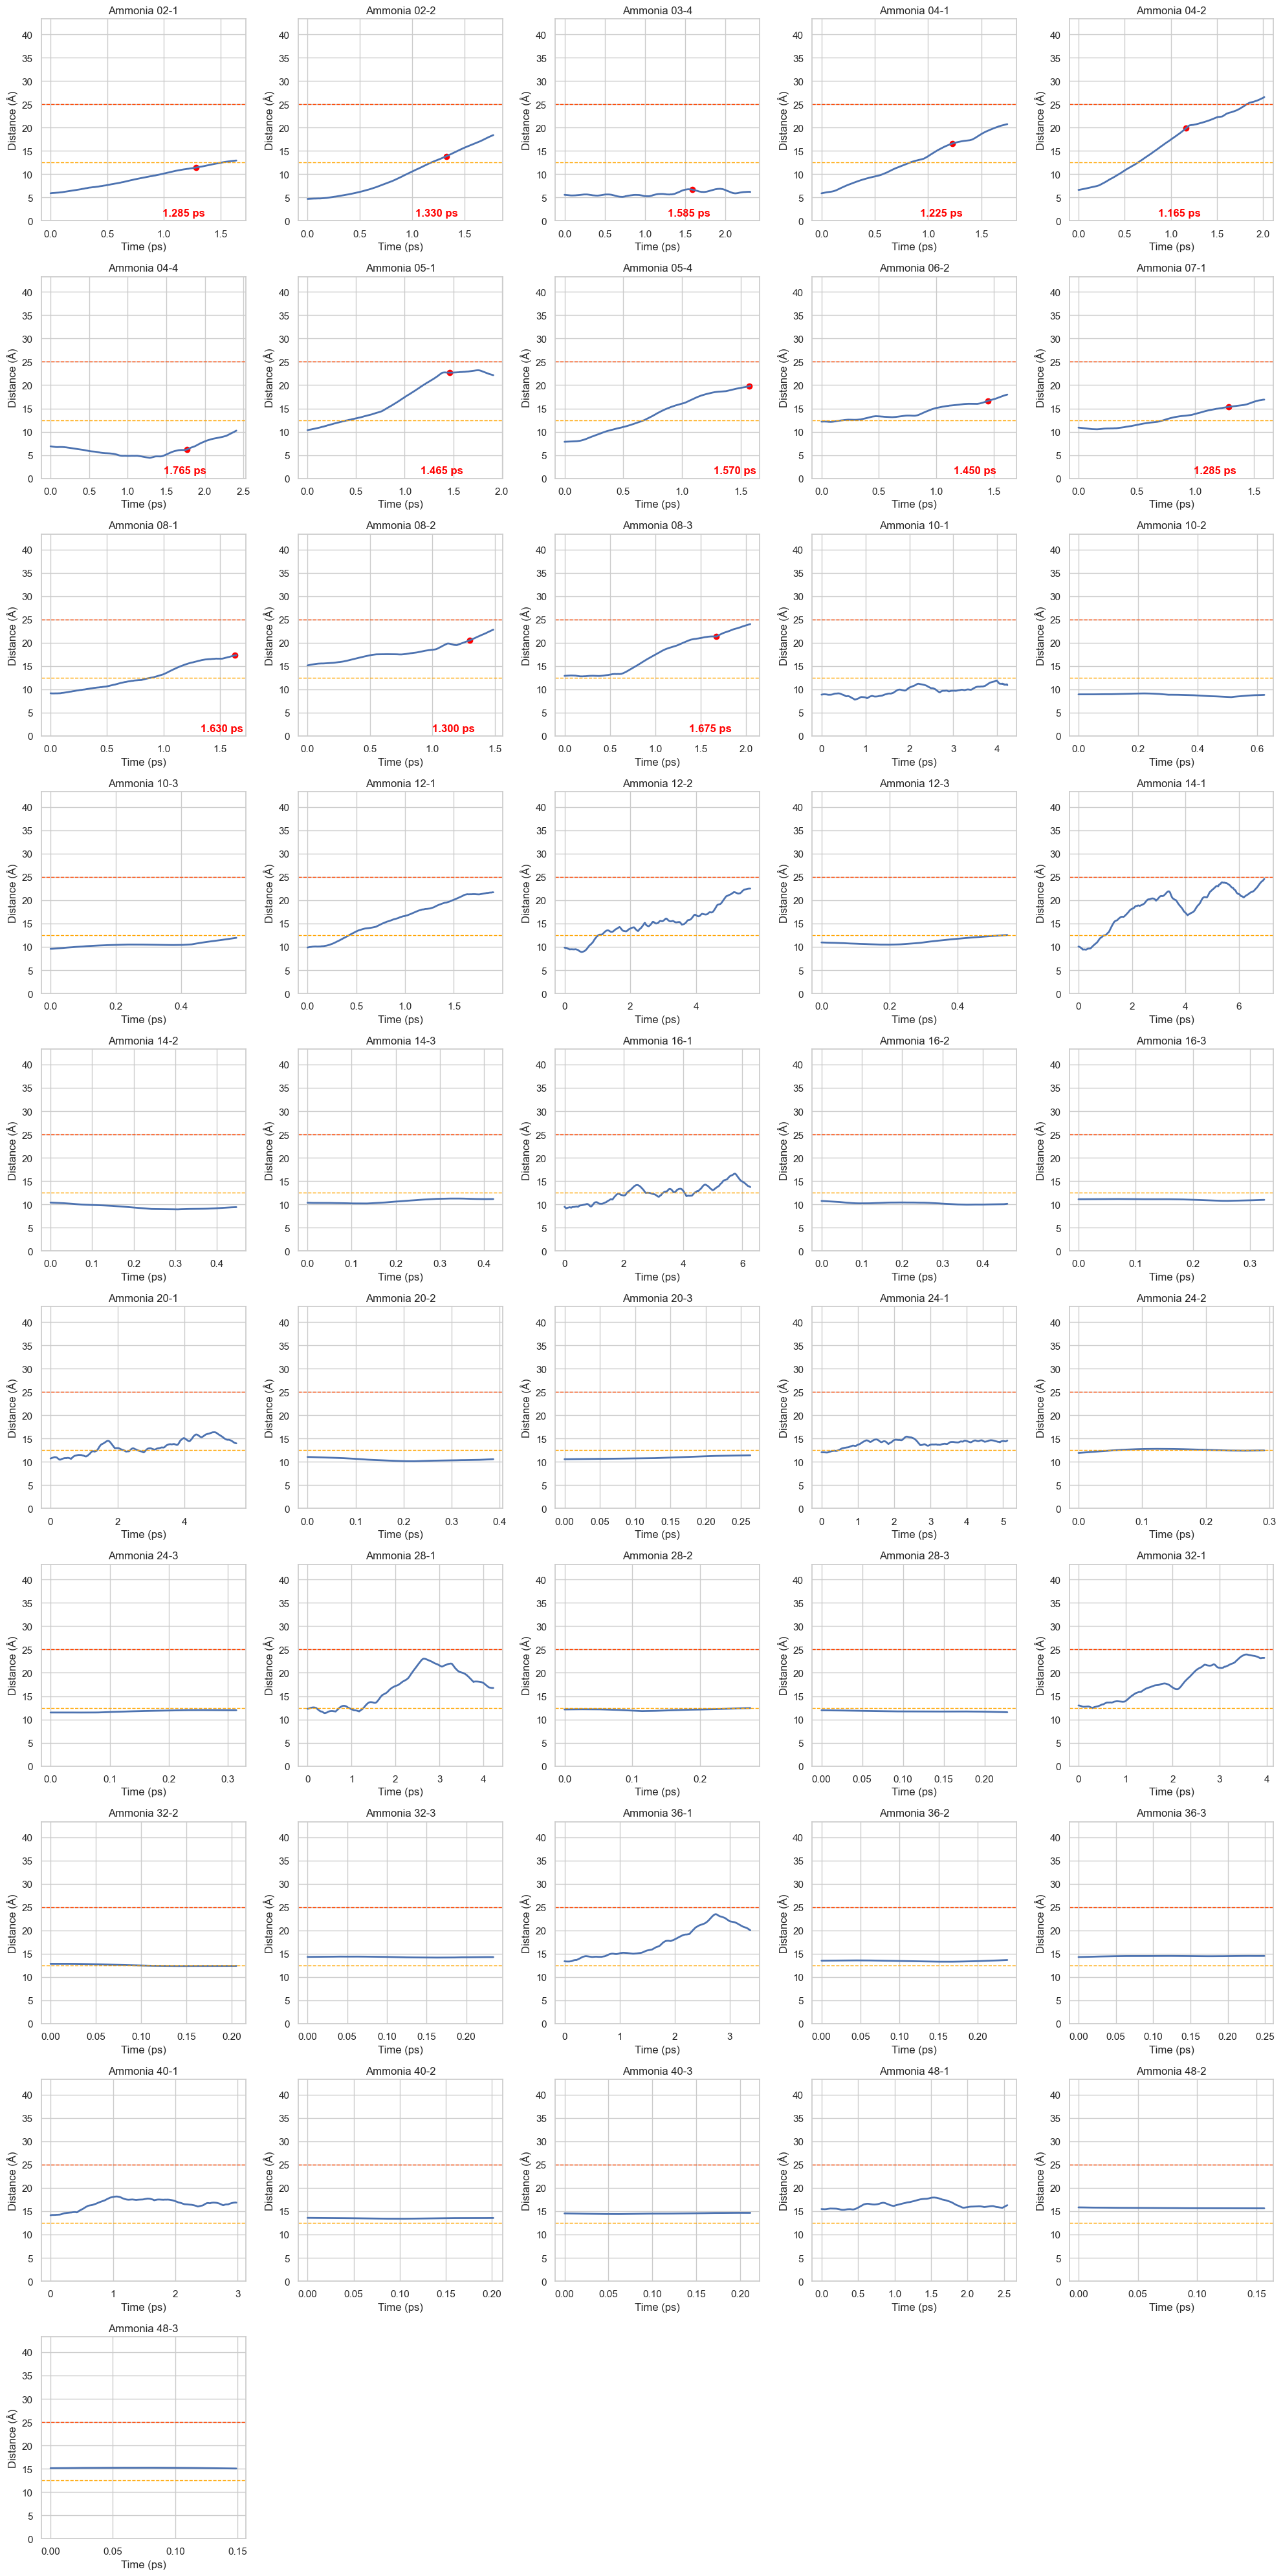

In [21]:
plt.figure(figsize=(20, 40))
num_files = len(csv_files_nn)
cols = 5 
rows = num_files // cols + (num_files % cols > 0)

for i, file in enumerate(csv_files_nn, 1):
    parts = file.split('-')
    no_ammonia = str(int(parts[0]))
    id_cluster = parts[1]
    data_name = int(no_ammonia + id_cluster)
    
    data = pd.read_csv(os.path.join(folder_path, file), header=None)
    ax = plt.subplot(rows, cols, i)
    
    try:
        # ax.plot([broken_systems[data_name]/2000, broken_systems[data_name]/2000], [0, max_box], color="red", linestyle='-', lw=1)
        ax.scatter(broken_systems[data_name]/2000, data[1][broken_systems[data_name]], color='red')
        ax.text(broken_systems[data_name]/2000 - 0.3, 1, f'{broken_systems[data_name]/2000:.3f} ps', color='red', weight="bold")
    except:
        pass
    
    ax.plot(data[0]/2000, data[1], label="Maximum distance", lw=2)
    ax.axhline(12.5, color="orange", linestyle='--', lw=1, label="Half of box")
    ax.axhline(25, color="orangered", linestyle='--', lw=1, label="Box")
    ax.set_title(f'Ammonia {file.rstrip("-nn.csv")}')
    ax.set_ylim(0,max_box)
    ax.set_xlabel('Time (ps)')
    ax.set_ylabel('Distance (Å)')

plt.tight_layout()
plt.show()

In [8]:
def plot_max_distances(system):
  frame, distance = np.loadtxt(f"{system}.csv", delimiter=",", unpack=True)
  plt.plot(frame, distance)
  plt.grid()
  plt.show()